Libraries to Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np


Upload Data

In [2]:
ash = pd.read_csv('Ashton14.csv')

deer = pd.read_csv('Deerlodge14.csv')

Explore and Clean Dat

In [3]:
### Drop column 0 as it is the same as the index column
ash.drop('Unnamed: 0', axis = 1, inplace = True)

ash['DATETIME'] = pd.to_datetime(ash['DATE'] + ' ' + ash['TIME'])

ash.set_index('DATETIME', inplace=True)


ash.head()

DATE   TIME    OBM    TU     WD    WG    WS    SI
DATETIME                                                                    
2014-01-01 00:00:00  01/01/2014  00:00  25.16  99.1  270.2  6.36  4.79  0.01
2014-01-01 01:00:00  01/01/2014  01:00  25.14  99.2  275.6  5.70  4.31  0.01
2014-01-01 02:00:00  01/01/2014  02:00  24.70  99.2  231.5  9.64  6.51  0.01
2014-01-01 03:00:00  01/01/2014  03:00  23.71  98.8  313.0  5.92  4.35  0.01
2014-01-01 04:00:00  01/01/2014  04:00  23.67  98.7  313.4  4.17  2.87  0.01

In [4]:
### Drop column 0 as it is the same as the index column
deer.drop('Unnamed: 0', axis = 1, inplace = True)

deer['DATETIME'] = pd.to_datetime(deer['DATE'] + ' ' + deer['TIME'])

deer.set_index('DATETIME', inplace=True)

deer.head(30)

DATE   TIME    OBM     TU      WD     WG    WS  \
DATETIME                                                                    
2014-01-01 00:00:00  01/01/2014  00:00  30.02  83.70   58.81   5.92  1.93   
2014-01-01 01:00:00  01/01/2014  01:00  29.25  81.80  254.60   6.36  2.67   
2014-01-01 02:00:00  01/01/2014  02:00  27.53  80.80   41.77   6.79  4.20   
2014-01-01 03:00:00  01/01/2014  03:00  30.25  67.56    2.07  14.03  9.25   
2014-01-01 04:00:00  01/01/2014  04:00  30.62  68.57   20.30  12.71  9.05   
2014-01-01 05:00:00  01/01/2014  05:00  29.54  71.13   20.41  10.96  7.04   
2014-01-01 06:00:00  01/01/2014  06:00  28.30  70.75  308.30   7.23  3.92   
2014-01-01 07:00:00  01/01/2014  07:00  26.67  78.23  258.00   6.14  2.27   
2014-01-01 08:00:00  01/01/2014  08:00  26.63  78.38   76.52   3.95  1.28   
2014-01-01 09:00:00  01/01/2014  09:00  30.05  64.43  319.40  10.08  4.88   
2014-01-01 10:00:00  01/01/2014  10:00  30.19  69.67  156.10   6.14  3.00   
2014-01-01 11:00:00  01/01/2014  11:00  33.99  56.07  232.80   6.58  3.57   
2014-01-01 12:00:00  01/01/2014  12:00  35.14  54.60   77.53   7.67  4.04   
2014-01-01 13:00:00  01/01/2014  13:00  37.27  46.19   86.60   7.45  3.69   
2014-01-01 14:00:00  01/01/2014  14:00  36.53  50.17   79.01  10.74  6.87   
2014-01-01 15:00:00  01/01/2014  15:00  36.89  49.04   60.36   9.21  6.05   
2014-01-01 16:00:00  01/01/2014  16:00  32.94  57.19   25.27   7.01  4.40   
2014-01-01 17:00:00  01/01/2014  17:00  30.21  65.44  295.60   4.38  2.31   
2014-01-01 18:00:00  01/01/2014  18:00  26.22  73.27  296.30   6.36  3.88   
2014-01-01 19:00:00  01/01/2014  19:00  25.16  76.74  277.50   5.04  2.39   
2014-01-01 20:00:00  01/01/2014  20:00  24.05  79.75  259.80   5.92  3.35   
2014-01-01 21:00:00  01/01/2014  21:00  25.68  84.60  207.00   6.79  4.43   
2014-01-01 22:00:00  01/01/2014  22:00  24.85  82.60  220.50   5.26  2.50   
2014-01-01 23:00:00  01/01/2014  23:00  25.14  84.60  209.30   2.19  0.72   
2014-01-02 00:00:00  01/02/2014  00:00  25.38  83.10  281.50   5.48  4.32   
2014-01-02 01:00:00  01/02/2014  01:00  25.34  85.20  274.00   4.60  2.47   
2014-01-02 02:00:00  01/02/2014  02:00  24.30  84.00  216.80   3.07  1.41   
2014-01-02 03:00:00  01/02/2014  03:00  24.21  83.10  135.40   3.51  1.50   
2014-01-02 04:00:00  01/02/2014  04:00  23.94  84.30  252.50   4.38  2.91   
2014-01-02 05:00:00  01/02/2014  05:00  23.92  85.90  135.10   3.51  1.05   

                        SI  
DATETIME                    
2014-01-01 00:00:00   0.00  
2014-01-01 01:00:00   0.00  
2014-01-01 02:00:00   0.00  
2014-01-01 03:00:00   0.00  
2014-01-01 04:00:00   0.00  
2014-01-01 05:00:00   0.00  
2014-01-01 06:00:00   0.00  
2014-01-01 07:00:00   0.00  
2014-01-01 08:00:00   0.02  
2014-01-01 09:00:00   2.40  
2014-01-01 10:00:00   6.64  
2014-01-01 11:00:00  15.16  
2014-01-01 12:00:00  27.30  
2014-01-01 13:00:00  35.17  
2014-01-01 14:00:00  27.56  
2014-01-01 15:00:00  20.50  
2014-01-01 16:00:00   4.42  
2014-01-01 17:00:00   0.42  
2014-01-01 18:00:00   0.00  
2014-01-01 19:00:00   0.00  
2014-01-01 20:00:00   0.00  
2014-01-01 21:00:00   0.00  
2014-01-01 22:00:00   0.00  
2014-01-01 23:00:00   0.00  
2014-01-02 00:00:00   0.00  
2014-01-02 01:00:00   0.00  
2014-01-02 02:00:00   0.00  
2014-01-02 03:00:00   0.00  
2014-01-02 04:00:00   0.00  
2014-01-02 05:00:00   0.00

In [5]:
deer.describe()

OBM           TU           WD           WG           WS  \
count  8758.000000  8758.000000  8758.000000  8758.000000  8758.000000   
mean     41.668198    63.388008   181.133123    11.180048     6.642539   
std      20.430825    21.555411   109.861446     7.941274     5.171045   
min     -28.050000     8.620000     0.000000     0.000000     0.000000   
25%      30.180000    47.475000    64.977500     5.040000     2.860000   
50%      41.915000    66.690000   193.000000     8.550000     4.880000   
75%      54.840000    81.200000   266.000000    15.340000     9.127500   
max      92.500000    99.800000   360.000000    55.460000    31.920000   

                SI  
count  8758.000000  
mean     15.244370  
std      22.603332  
min       0.000000  
25%       0.000000  
50%       0.490000  
75%      25.600000  
max     102.200000

In [6]:
ash.describe()

OBM           TU           WD           WG           WS  \
count  8758.000000  8758.000000  8758.000000  8758.000000  8758.000000   
mean     42.685299    68.325476   152.269885    11.253042     7.097929   
std      19.235792    23.108249    89.231140     7.423922     5.025392   
min     -19.890000     9.750000     0.000000     0.000000     0.000000   
25%      29.932500    50.162500    82.500000     6.140000     3.720000   
50%      41.500000    73.975000   114.500000     9.210000     5.730000   
75%      56.135000    87.500000   232.100000    14.030000     8.830000   
max      89.400000   100.100000   359.900000    49.100000    33.690000   

                SI  
count  8758.000000  
mean     15.827253  
std      23.605074  
min       0.000000  
25%       0.010000  
50%       0.450000  
75%      26.280000  
max     154.300000

In [7]:
## Check for issues with NA values, don't appear to be any

deer.info()
ash.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2014-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    8758 non-null   object 
 1   TIME    8758 non-null   object 
 2   OBM     8758 non-null   float64
 3   TU      8758 non-null   float64
 4   WD      8758 non-null   float64
 5   WG      8758 non-null   float64
 6   WS      8758 non-null   float64
 7   SI      8758 non-null   float64
dtypes: float64(6), object(2)
memory usage: 615.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2014-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    8758 non-null   object 
 1   TIME    8758 non-null   object 
 2   OBM     8758 non-null   float64
 3   TU      8758 non-null   float64
 4   WD      8758 non-null   float64
 5   WG      8758 non-null   floa

In [8]:
### Convert "SI" column from langleys/hour to W/m2. Note, 1 langley/hour = 11.63 Watts/m2
ash['SI'] = ash['SI'] * 11.63

deer['SI'] = deer['SI'] * 11.63

ash.head(25)


DATE   TIME    OBM    TU      WD     WG    WS  \
DATETIME                                                                   
2014-01-01 00:00:00  01/01/2014  00:00  25.16  99.1  270.20   6.36  4.79   
2014-01-01 01:00:00  01/01/2014  01:00  25.14  99.2  275.60   5.70  4.31   
2014-01-01 02:00:00  01/01/2014  02:00  24.70  99.2  231.50   9.64  6.51   
2014-01-01 03:00:00  01/01/2014  03:00  23.71  98.8  313.00   5.92  4.35   
2014-01-01 04:00:00  01/01/2014  04:00  23.67  98.7  313.40   4.17  2.87   
2014-01-01 05:00:00  01/01/2014  05:00  23.56  98.3  350.80   1.53  0.37   
2014-01-01 06:00:00  01/01/2014  06:00  23.18  98.1  306.50   1.75  0.41   
2014-01-01 07:00:00  01/01/2014  07:00  22.88  97.9  309.50   4.17  1.71   
2014-01-01 08:00:00  01/01/2014  08:00  22.89  97.9  304.30   4.17  2.57   
2014-01-01 09:00:00  01/01/2014  09:00  22.42  97.5  340.90   5.48  3.23   
2014-01-01 10:00:00  01/01/2014  10:00  22.87  97.4   19.24   4.17  3.22   
2014-01-01 11:00:00  01/01/2014  11:00  23.49  97.7   59.79   4.60  3.45   
2014-01-01 12:00:00  01/01/2014  12:00  24.45  97.2   65.50   4.60  3.38   
2014-01-01 13:00:00  01/01/2014  13:00  24.88  97.2   64.94   5.26  4.01   
2014-01-01 14:00:00  01/01/2014  14:00  26.80  98.0  359.60   1.97  0.92   
2014-01-01 15:00:00  01/01/2014  15:00  25.05  97.5  323.40   5.70  3.90   
2014-01-01 16:00:00  01/01/2014  16:00  24.81  97.7   31.48   2.85  1.69   
2014-01-01 17:00:00  01/01/2014  17:00  24.01  97.9   26.86   5.26  3.66   
2014-01-01 18:00:00  01/01/2014  18:00  23.12  97.0   49.22   5.70  4.58   
2014-01-01 19:00:00  01/01/2014  19:00  22.70  96.5   77.90   7.01  4.58   
2014-01-01 20:00:00  01/01/2014  20:00  21.26  94.7  147.30  12.71  9.09   
2014-01-01 21:00:00  01/01/2014  21:00  19.29  95.1  139.80  10.08  7.67   
2014-01-01 22:00:00  01/01/2014  22:00  17.33  95.0  128.00  10.74  7.91   
2014-01-01 23:00:00  01/01/2014  23:00  18.44  95.2  115.10  10.96  7.80   
2014-01-02 00:00:00  01/02/2014  00:00  17.90  93.4  116.50  11.62  9.00   

                           SI  
DATETIME                       
2014-01-01 00:00:00    0.1163  
2014-01-01 01:00:00    0.1163  
2014-01-01 02:00:00    0.1163  
2014-01-01 03:00:00    0.1163  
2014-01-01 04:00:00    0.1163  
2014-01-01 05:00:00    0.1163  
2014-01-01 06:00:00    0.1163  
2014-01-01 07:00:00    0.1163  
2014-01-01 08:00:00    2.0934  
2014-01-01 09:00:00   33.3781  
2014-01-01 10:00:00   87.1087  
2014-01-01 11:00:00  145.2587  
2014-01-01 12:00:00  213.9920  
2014-01-01 13:00:00  225.1568  
2014-01-01 14:00:00  188.5223  
2014-01-01 15:00:00  159.9125  
2014-01-01 16:00:00   72.3386  
2014-01-01 17:00:00    6.5128  
2014-01-01 18:00:00    0.0000  
2014-01-01 19:00:00    0.0000  
2014-01-01 20:00:00    0.1163  
2014-01-01 21:00:00    0.1163  
2014-01-01 22:00:00    0.1163  
2014-01-01 23:00:00    0.1163  
2014-01-02 00:00:00    0.0000

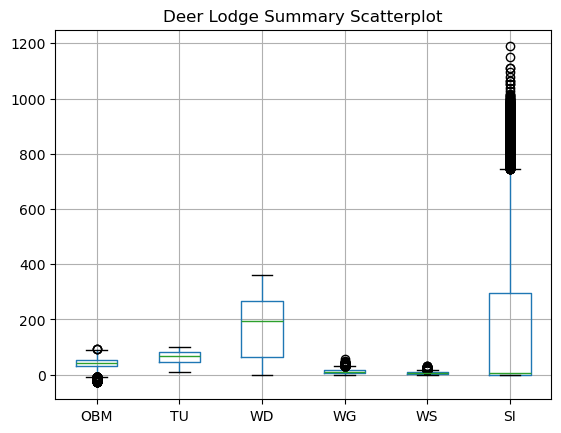

In [9]:
### Scatter Plot to Explore Outliers

deer.boxplot()
plt.title('Deer Lodge Summary Scatterplot')
plt.show()

###REPORT NOTES, SI HAS  MOST OUTLIERS, BUT THIS MAKES SENSE AS SOLAR RADIATION IS ZERO ALL NIGHT

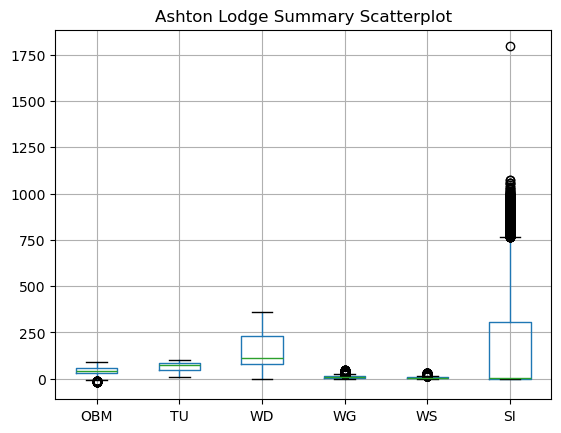

In [10]:
### Scatter Plot to Explore Outliers

ash.boxplot()
plt.title('Ashton Lodge Summary Scatterplot')
plt.show()

###REPORT NOTES, SI HAS  MOST OUTLIERS, BUT THIS MAKES SENSE AS SOLAR RADIATION IS ZERO ALL NIGHT

## Solar Radiation Exploration

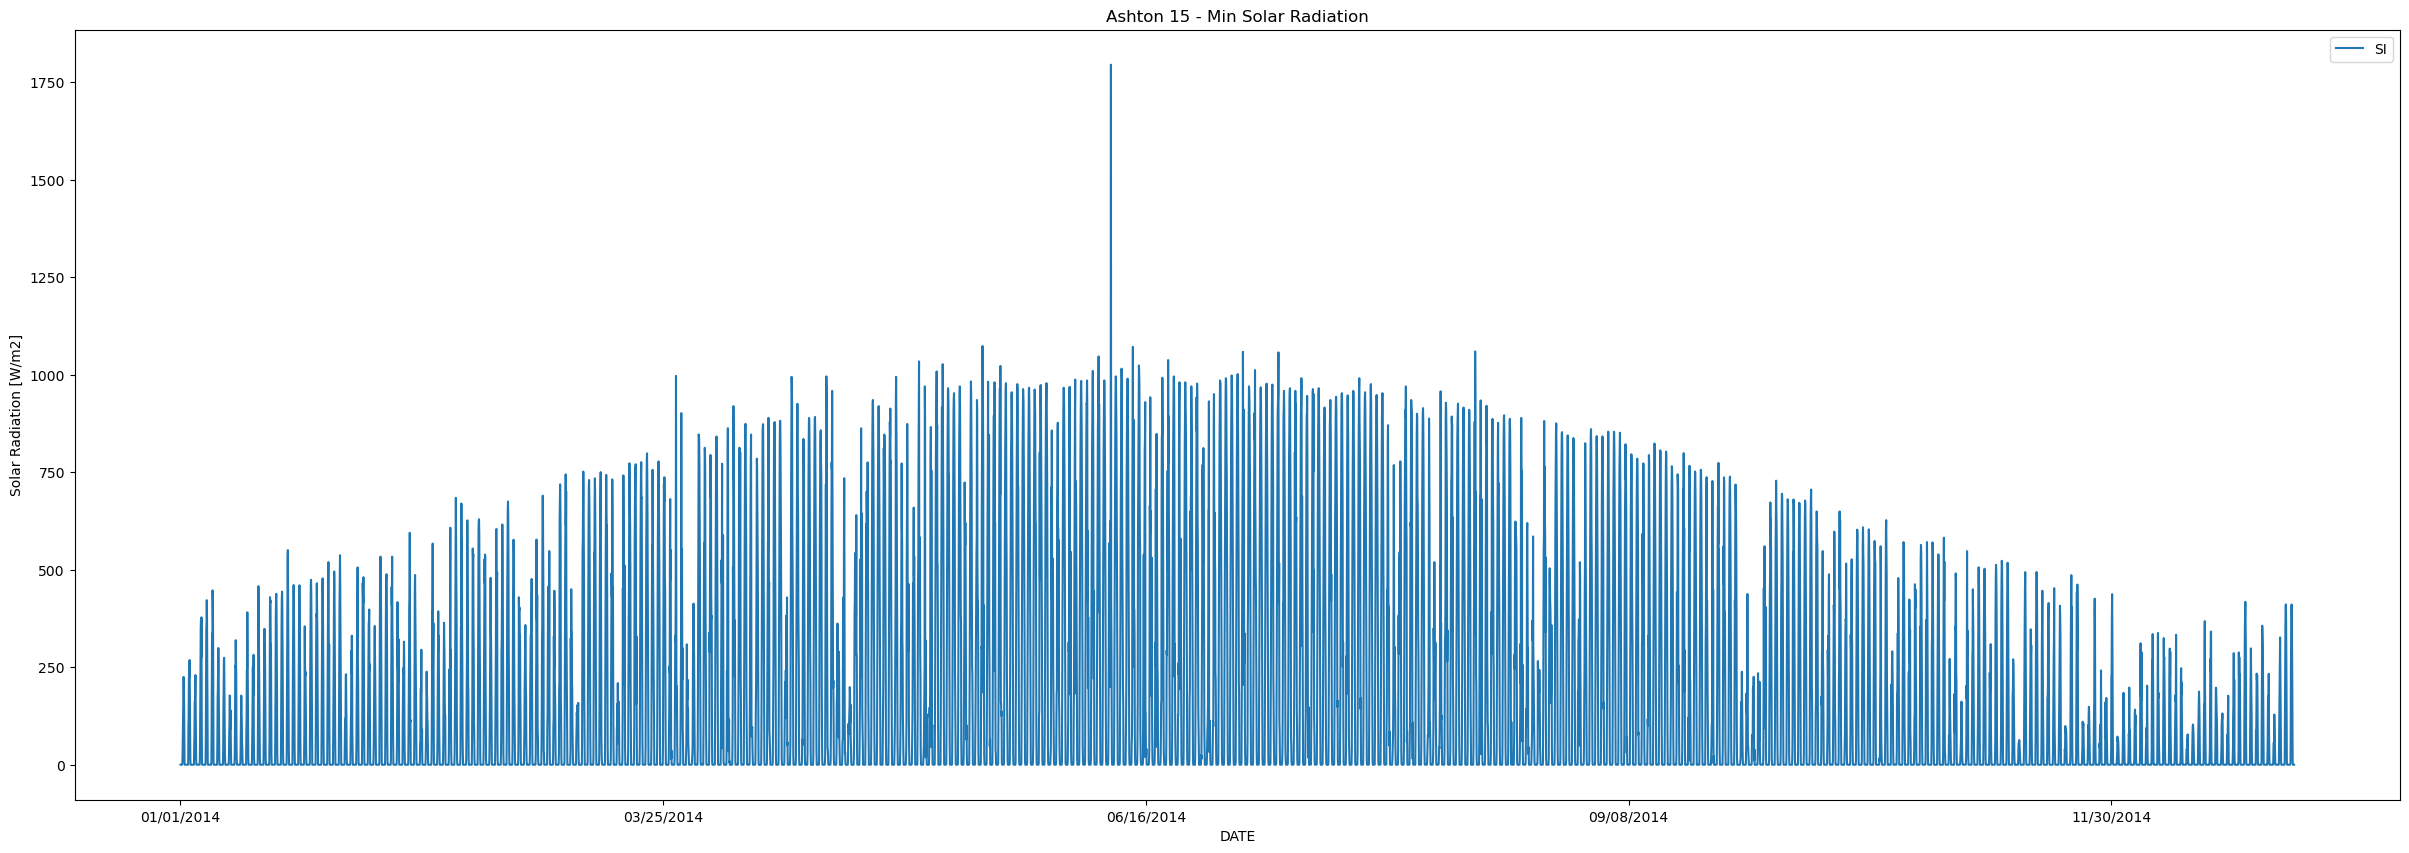

In [11]:
ash.plot(kind = 'line', x = 'DATE', y = 'SI', figsize = (30,10))
plt.title('Ashton 15 - Min Solar Radiation')
plt.ylabel('Solar Radiation [W/m2]')
plt.show()

ash.to_clipboard(index=False,header=False)



In [12]:
### Determine average daily solar radiation. Determine total annual solar radiation

daily_sum = ash['SI'].resample('D').sum()
print(daily_sum.mean(), 'W / m2 / day')

print(ash['SI'].sum(), 'W / m2 / year' )


4416.694192876713 W / m2 / day
1612093.3804 W / m2 / year


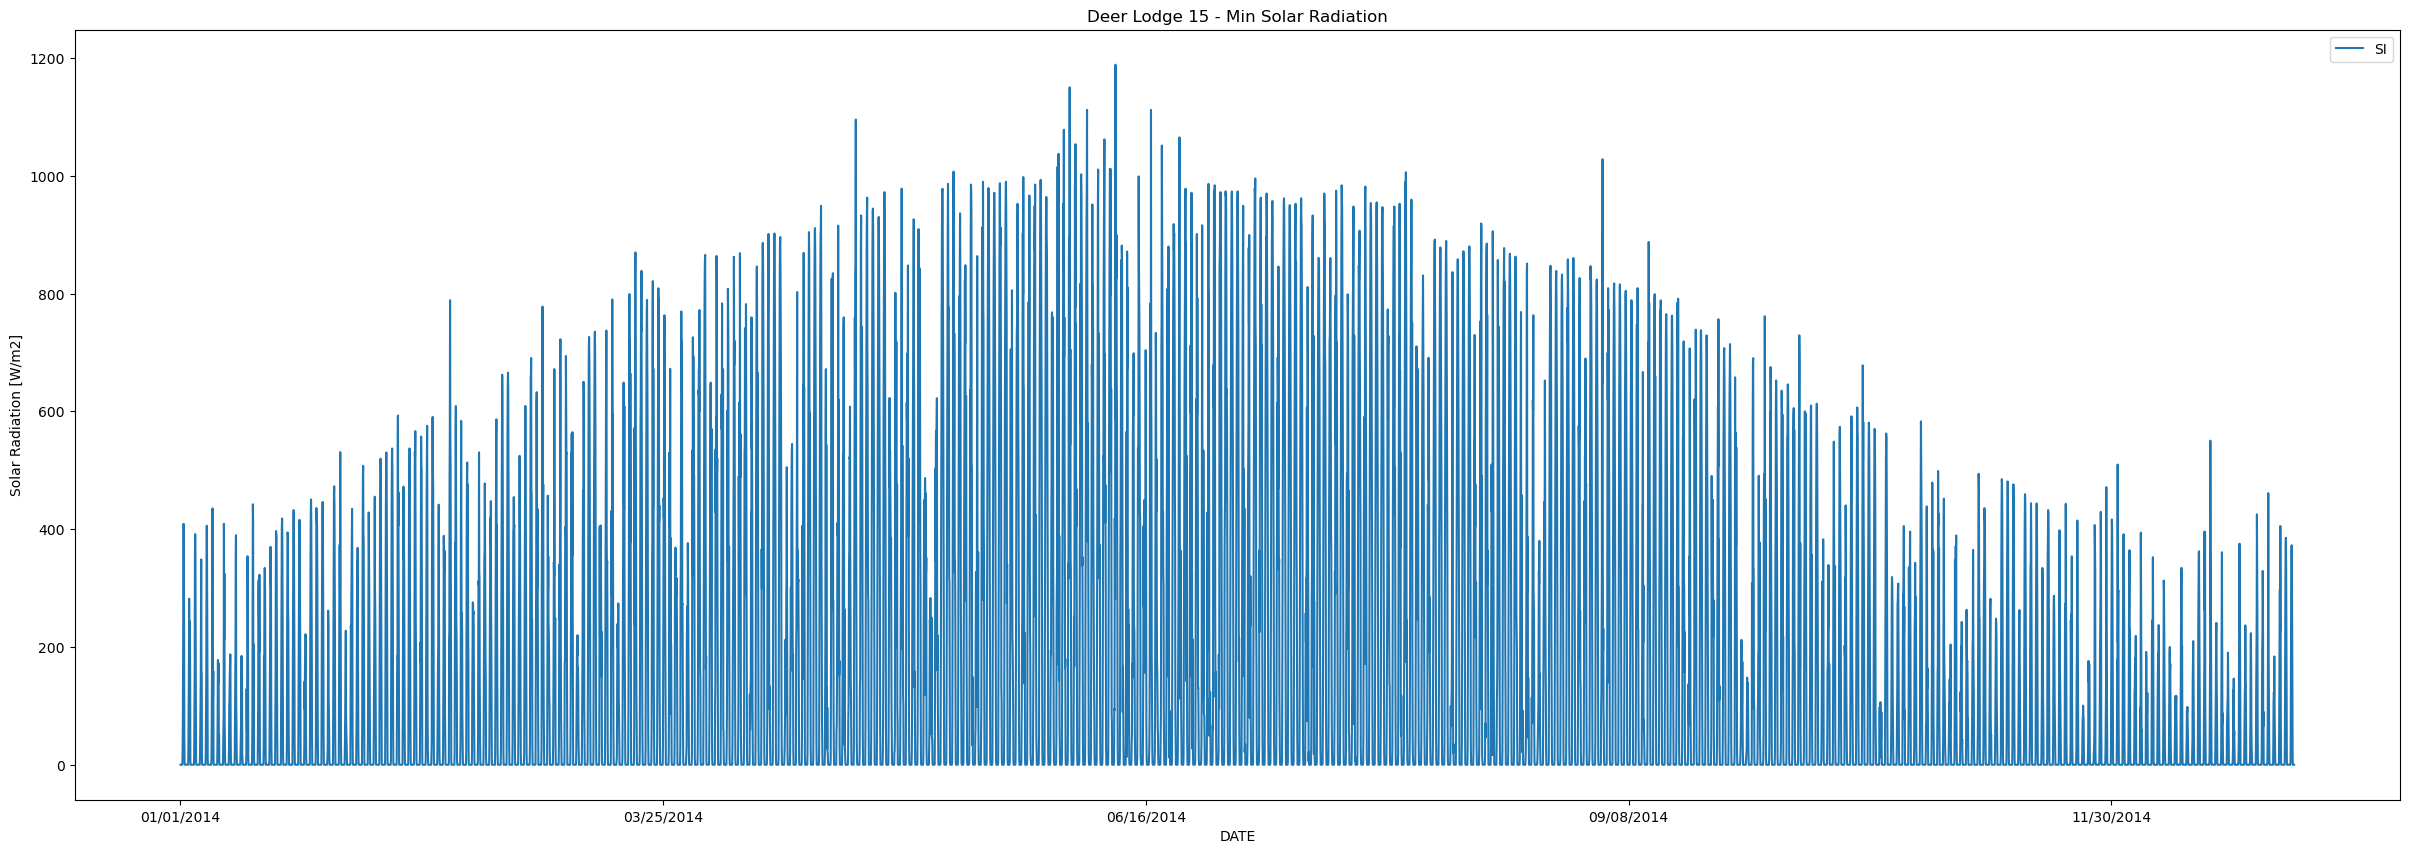

In [13]:
deer.plot(kind = 'line', x = 'DATE', y = 'SI', figsize = (30,10))
plt.title('Deer Lodge 15 - Min Solar Radiation')
plt.ylabel('Solar Radiation [W/m2]')
plt.show()

In [14]:
### Determine average daily solar radiation. Determine total annual solar radiation

daily_sum = deer['SI'].resample('D').sum()
print(daily_sum.mean(), 'W / m2 / day')

print(deer['SI'].sum(), 'W / m2 / year' )

#ash['SI'].sum()/365
#ash['SI'].mean()

4254.037012876714 W / m2 / day
1552723.5097 W / m2 / year


In [15]:
#####Ashton gets more solar per year and more average solar per day.

## Wind Exploration (Gust, Speed, and Direction)

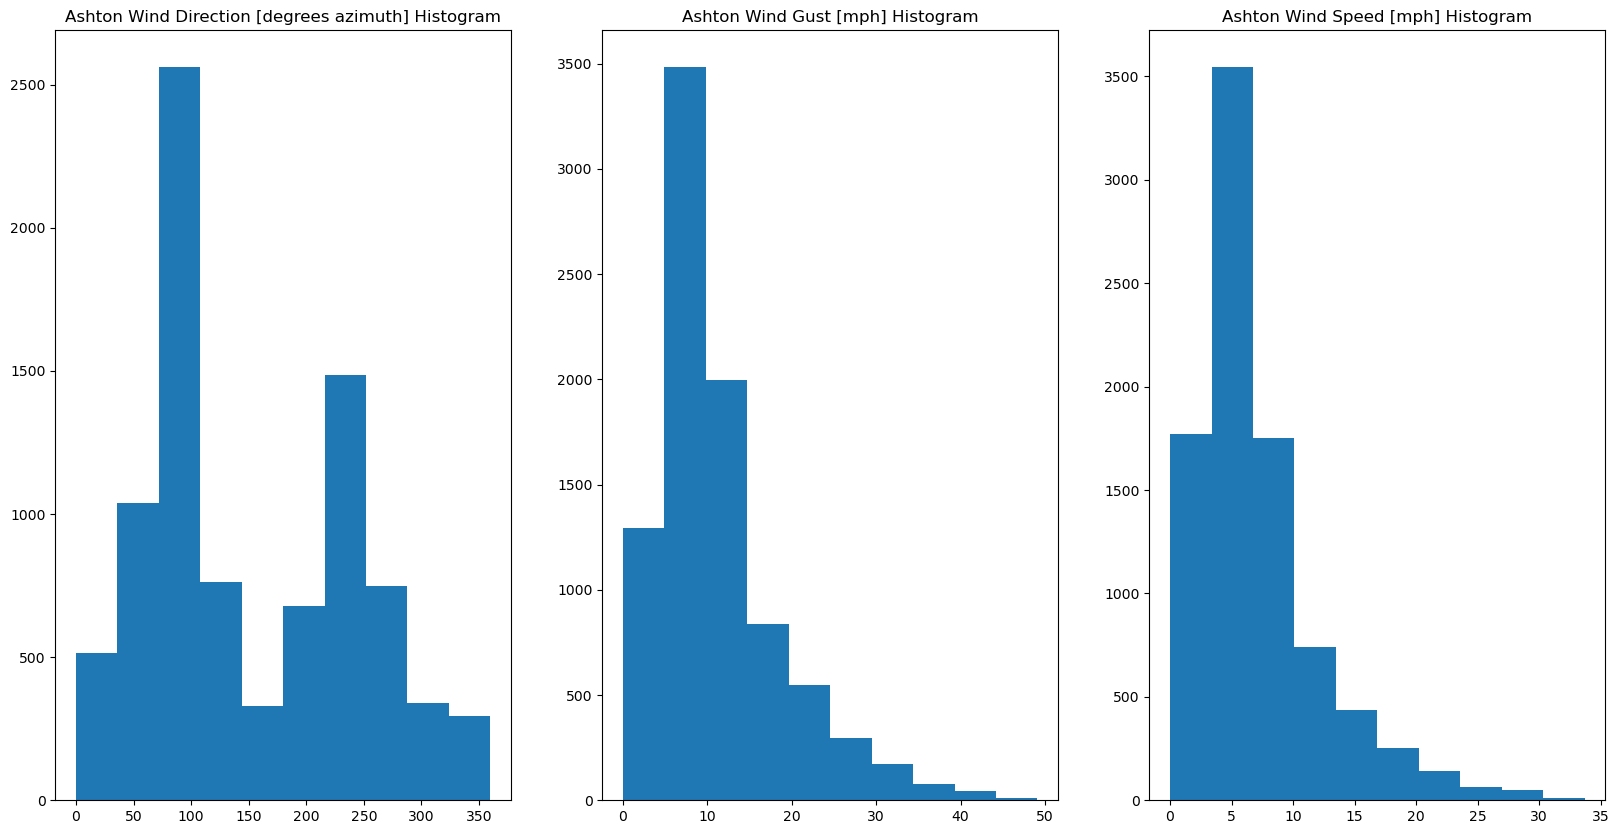

OBM           TU           WD           WG           WS  \
count  8758.000000  8758.000000  8758.000000  8758.000000  8758.000000   
mean     41.668198    63.388008   181.133123    11.180048     6.642539   
std      20.430825    21.555411   109.861446     7.941274     5.171045   
min     -28.050000     8.620000     0.000000     0.000000     0.000000   
25%      30.180000    47.475000    64.977500     5.040000     2.860000   
50%      41.915000    66.690000   193.000000     8.550000     4.880000   
75%      54.840000    81.200000   266.000000    15.340000     9.127500   
max      92.500000    99.800000   360.000000    55.460000    31.920000   

                SI  
count  8758.000000  
mean    177.292020  
std     262.876754  
min       0.000000  
25%       0.000000  
50%       5.698700  
75%     297.728000  
max    1188.586000

In [16]:
## Wind Gust, Speed and Direction Exploration for Deer Lodge
ash.describe()

WD_ash = ash['WD']
WG_ash = ash['WG']
WS_ash = ash['WS']

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.hist(WD_ash)
ax1.title.set_text('Ashton Wind Direction [degrees azimuth] Histogram')

ax2.hist(WG_ash)
ax2.title.set_text('Ashton Wind Gust [mph] Histogram')

ax3.hist(WS_ash)
ax3.title.set_text('Ashton Wind Speed [mph] Histogram')

plt.show()

## Ashton wind gust average 11.25 mph with SD 7.42.
## Ashton wind speed average 7.097 mph with SD 5.025.
## Ashton wind direction average 152.2698 degrees, with SD 89.23

deer.describe()
## Deer Lodge wind gust average 11.18 mph with SD 7.9412.
## Deer Lodge wind speed average 6.64 mph with SD 5.17.
## Deer Lodge wind direction average 181.133 degrees, with SD 109.86


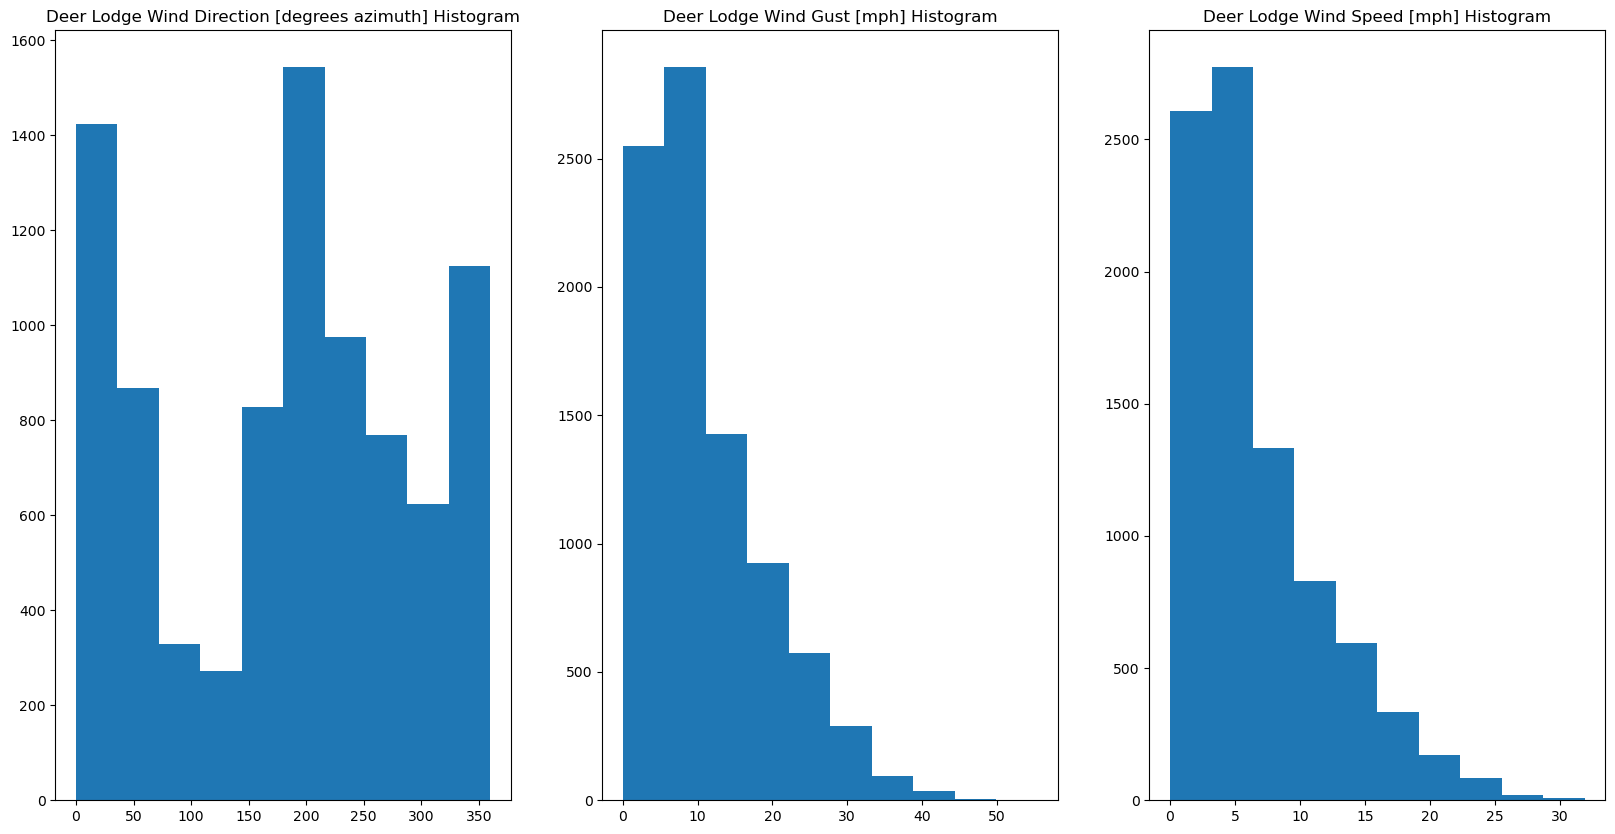

OBM           TU           WD           WG           WS  \
count  8758.000000  8758.000000  8758.000000  8758.000000  8758.000000   
mean     41.668198    63.388008   181.133123    11.180048     6.642539   
std      20.430825    21.555411   109.861446     7.941274     5.171045   
min     -28.050000     8.620000     0.000000     0.000000     0.000000   
25%      30.180000    47.475000    64.977500     5.040000     2.860000   
50%      41.915000    66.690000   193.000000     8.550000     4.880000   
75%      54.840000    81.200000   266.000000    15.340000     9.127500   
max      92.500000    99.800000   360.000000    55.460000    31.920000   

                SI  
count  8758.000000  
mean    177.292020  
std     262.876754  
min       0.000000  
25%       0.000000  
50%       5.698700  
75%     297.728000  
max    1188.586000

In [19]:
## Wind Gust, Speed and Direction Exploration for Deer Lodge
ash.describe()

WD_deer = deer['WD']
WG_deer = deer['WG']
WS_deer = deer['WS']

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))

ax1.hist(WD_deer)
ax1.title.set_text('Deer Lodge Wind Direction [degrees azimuth] Histogram')

ax2.hist(WG_deer)
ax2.title.set_text('Deer Lodge Wind Gust [mph] Histogram')

ax3.hist(WS_deer)
ax3.title.set_text('Deer Lodge Wind Speed [mph] Histogram')

plt.show()

## Ashton wind gust average 11.25 mph with SD 7.42.
## Ashton wind speed average 7.097 mph with SD 5.025.
## Ashton wind direction average 152.2698 degrees, with SD 89.23

deer.describe()
## Deer Lodge wind gust average 11.18 mph with SD 7.9412.
## Deer Lodge wind speed average 6.64 mph with SD 5.17.
## Deer Lodge wind direction average 181.133 degrees, with SD 109.86


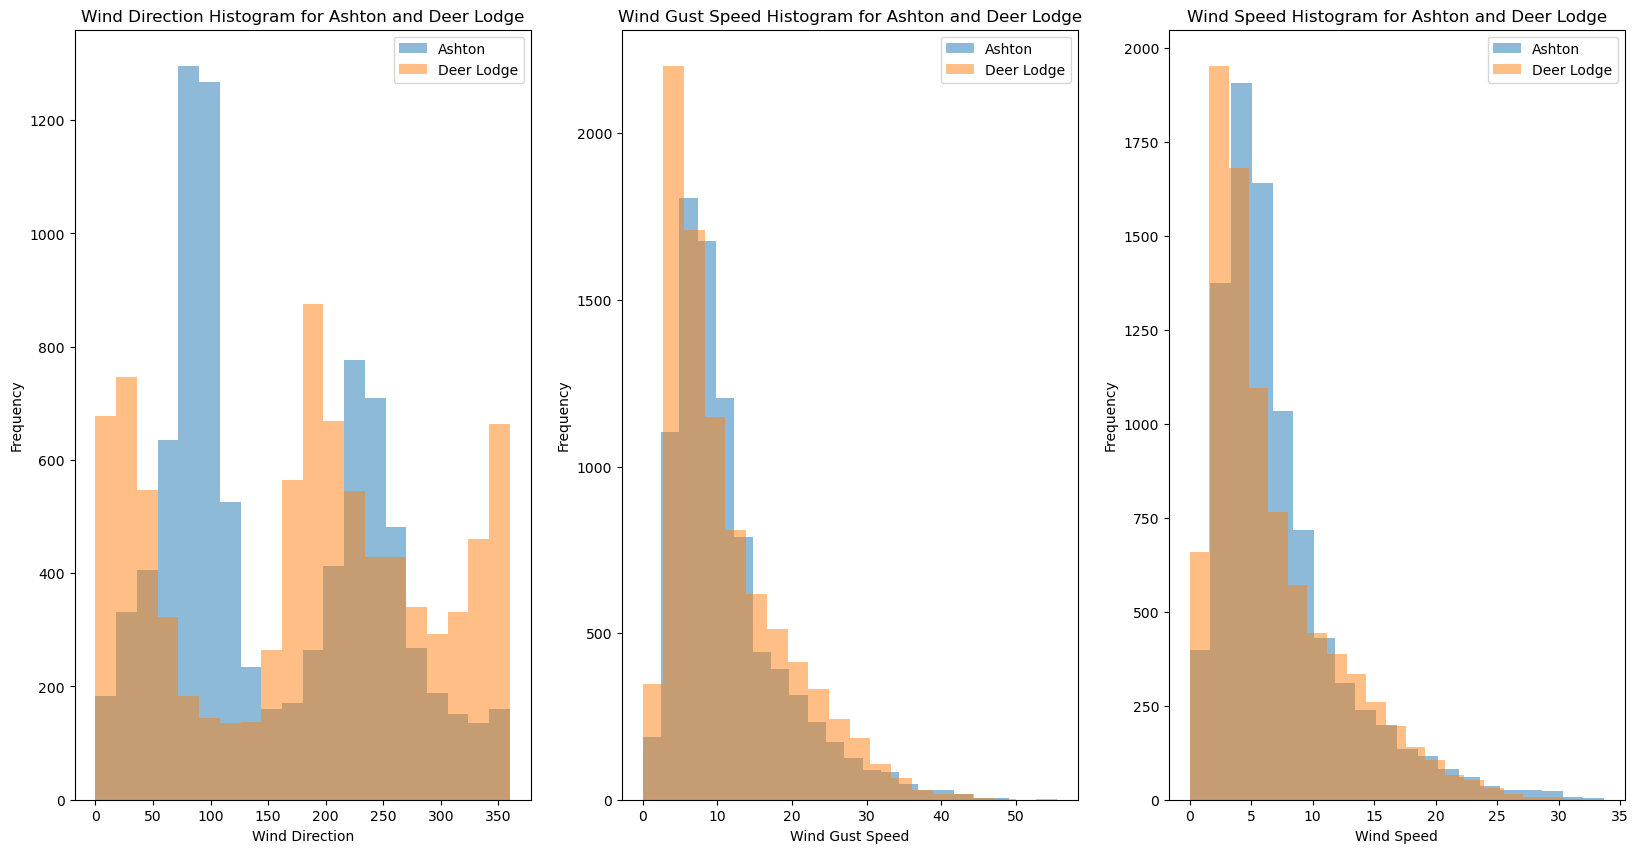

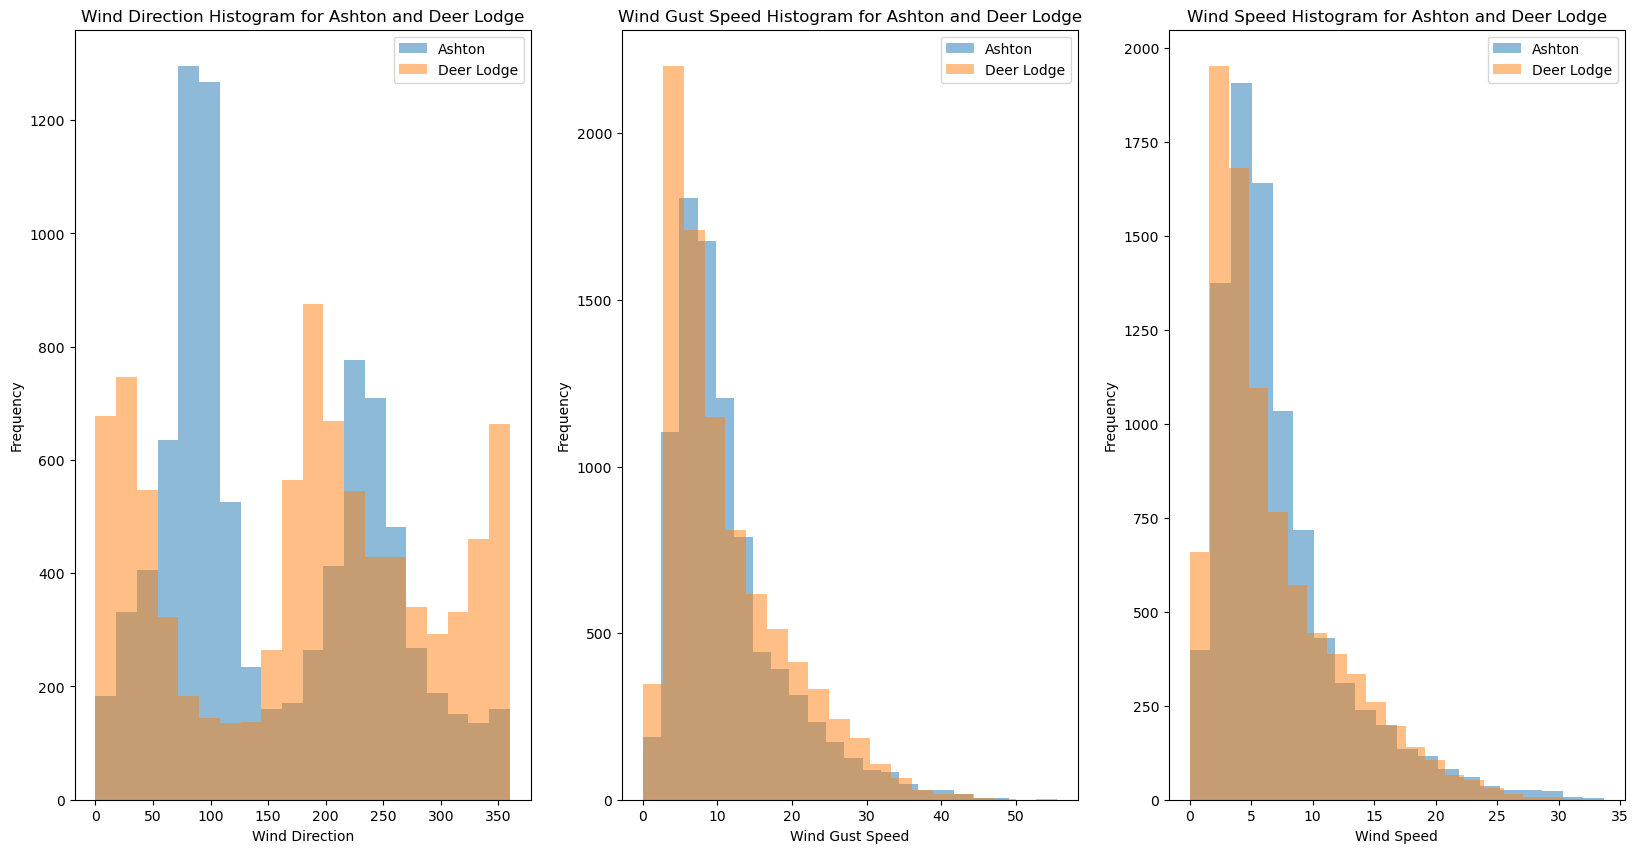

In [24]:
### Side by Side histograms for comparision of Wind

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,10))


#### Wind Direction
#fig, ax = plt.subplots()

ax1.hist(WD_ash, bins = 20, alpha = 0.5, label = 'Ashton')
ax1.hist(WD_deer, bins = 20, alpha = 0.5, label = 'Deer Lodge')

ax1.set_xlabel('Wind Direction')
ax1.set_ylabel('Frequency')
ax1.set_title('Wind Direction Histogram for Ashton and Deer Lodge')
ax1.legend()
#plt.show()

#### Wind Gust
#fig, ax = plt.subplots()



ax2.hist(WG_ash, bins = 20, alpha = 0.5, label = 'Ashton')
ax2.hist(WG_deer, bins = 20, alpha = 0.5, label = 'Deer Lodge')

ax2.set_xlabel('Wind Gust Speed')
ax2.set_ylabel('Frequency')
ax2.set_title('Wind Gust Speed Histogram for Ashton and Deer Lodge')
ax2.legend()
#plt.show()

#### Wind Speed
#fig, ax = plt.subplots()

ax3.hist(WS_ash, bins = 20, alpha = 0.5, label = 'Ashton')
ax3.hist(WS_deer, bins = 20, alpha = 0.5, label = 'Deer Lodge')

ax3.set_xlabel('Wind Speed')
ax3.set_ylabel('Frequency')
ax3.set_title('Wind Speed Histogram for Ashton and Deer Lodge')
ax3.legend()
plt.show()



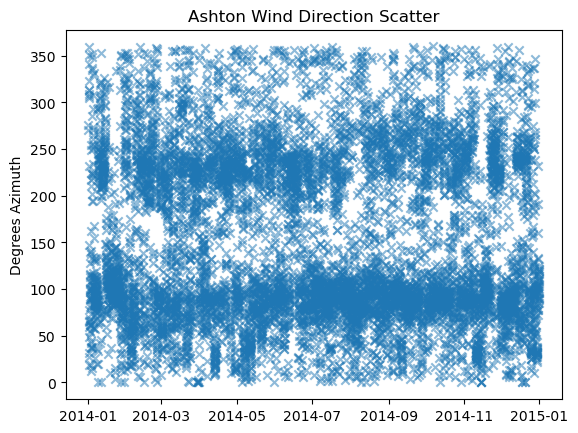

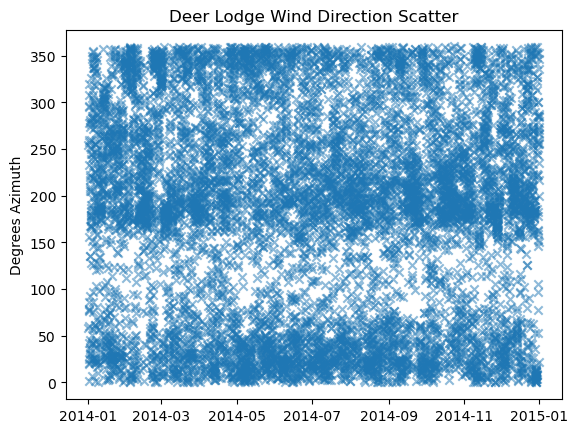

In [17]:
# Wind Direction Scatter Plot

plt.scatter(ash.index, WD_ash, marker = 'x', alpha = 0.5)
plt.title('Ashton Wind Direction Scatter')
plt.ylabel('Degrees Azimuth')
plt.show()

plt.scatter(deer.index, WD_deer, marker = 'x', alpha = 0.5)
plt.title('Deer Lodge Wind Direction Scatter')
plt.ylabel('Degrees Azimuth')
plt.show()

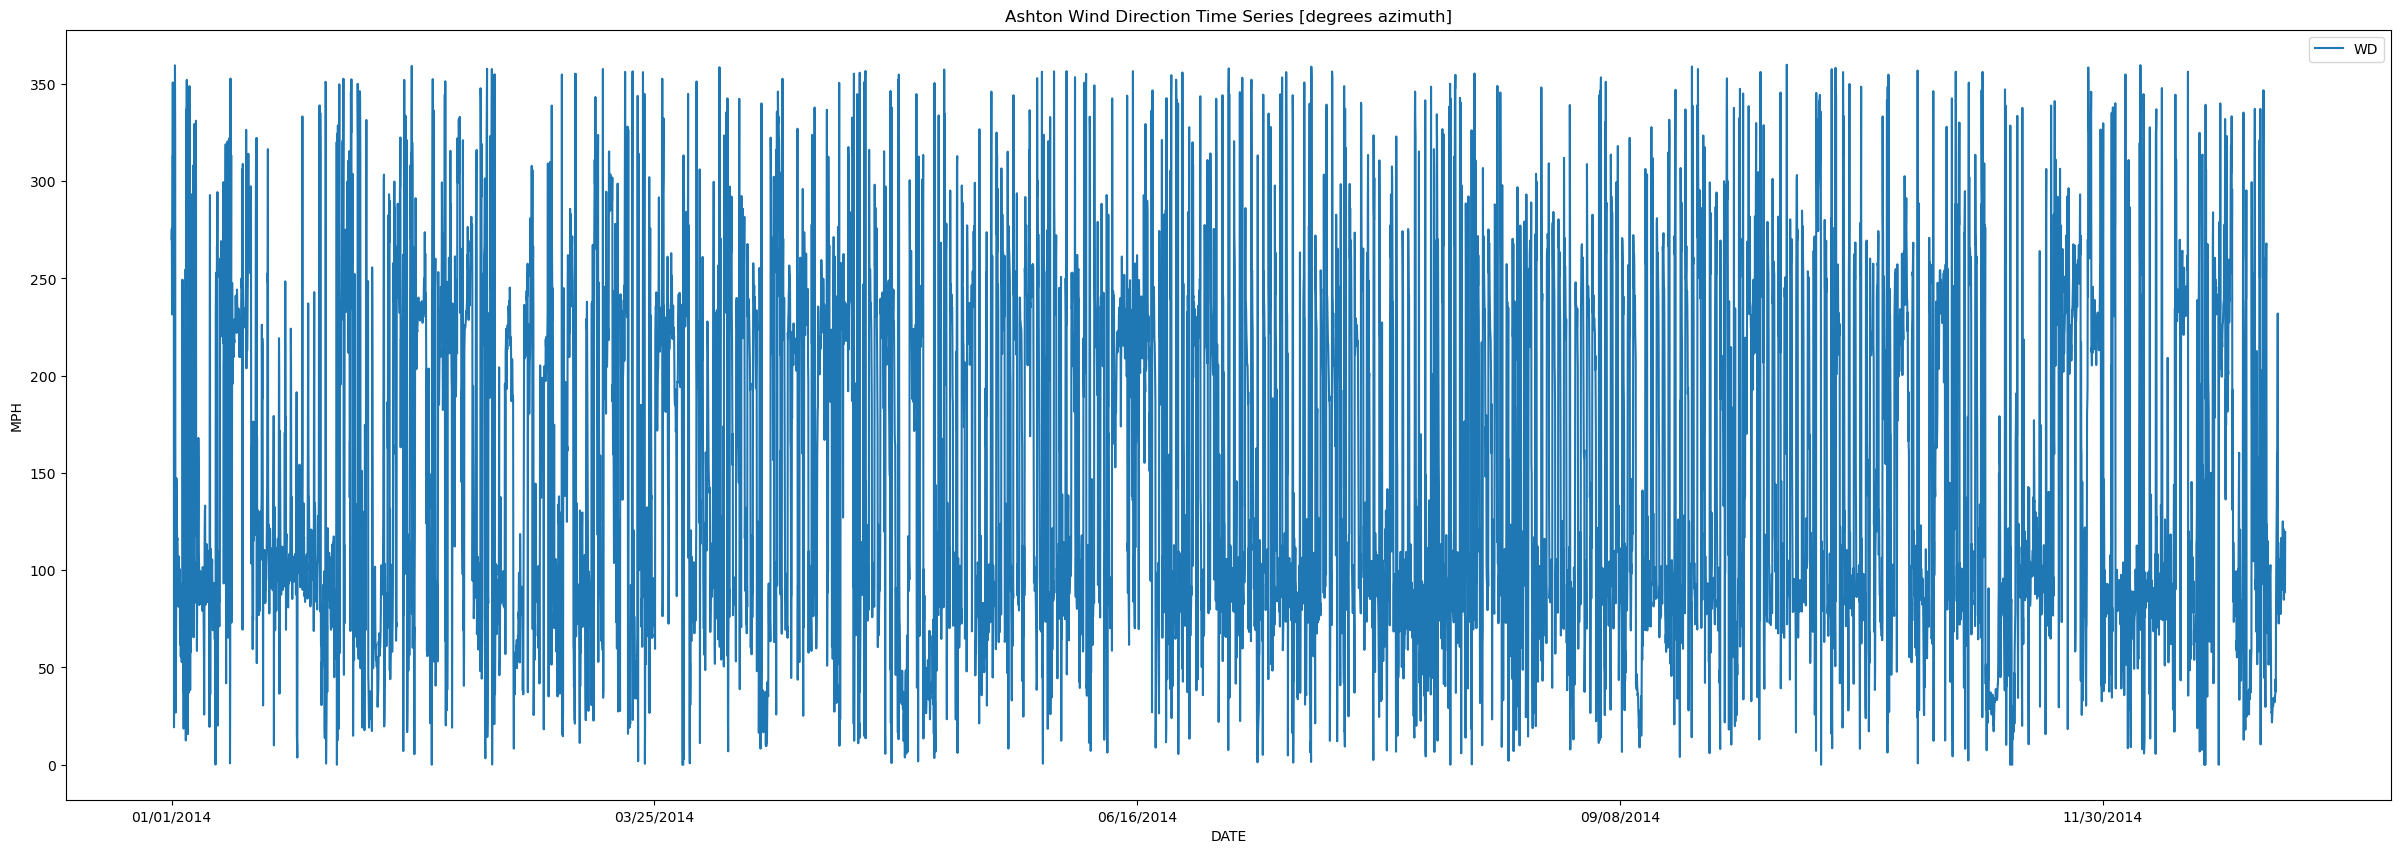

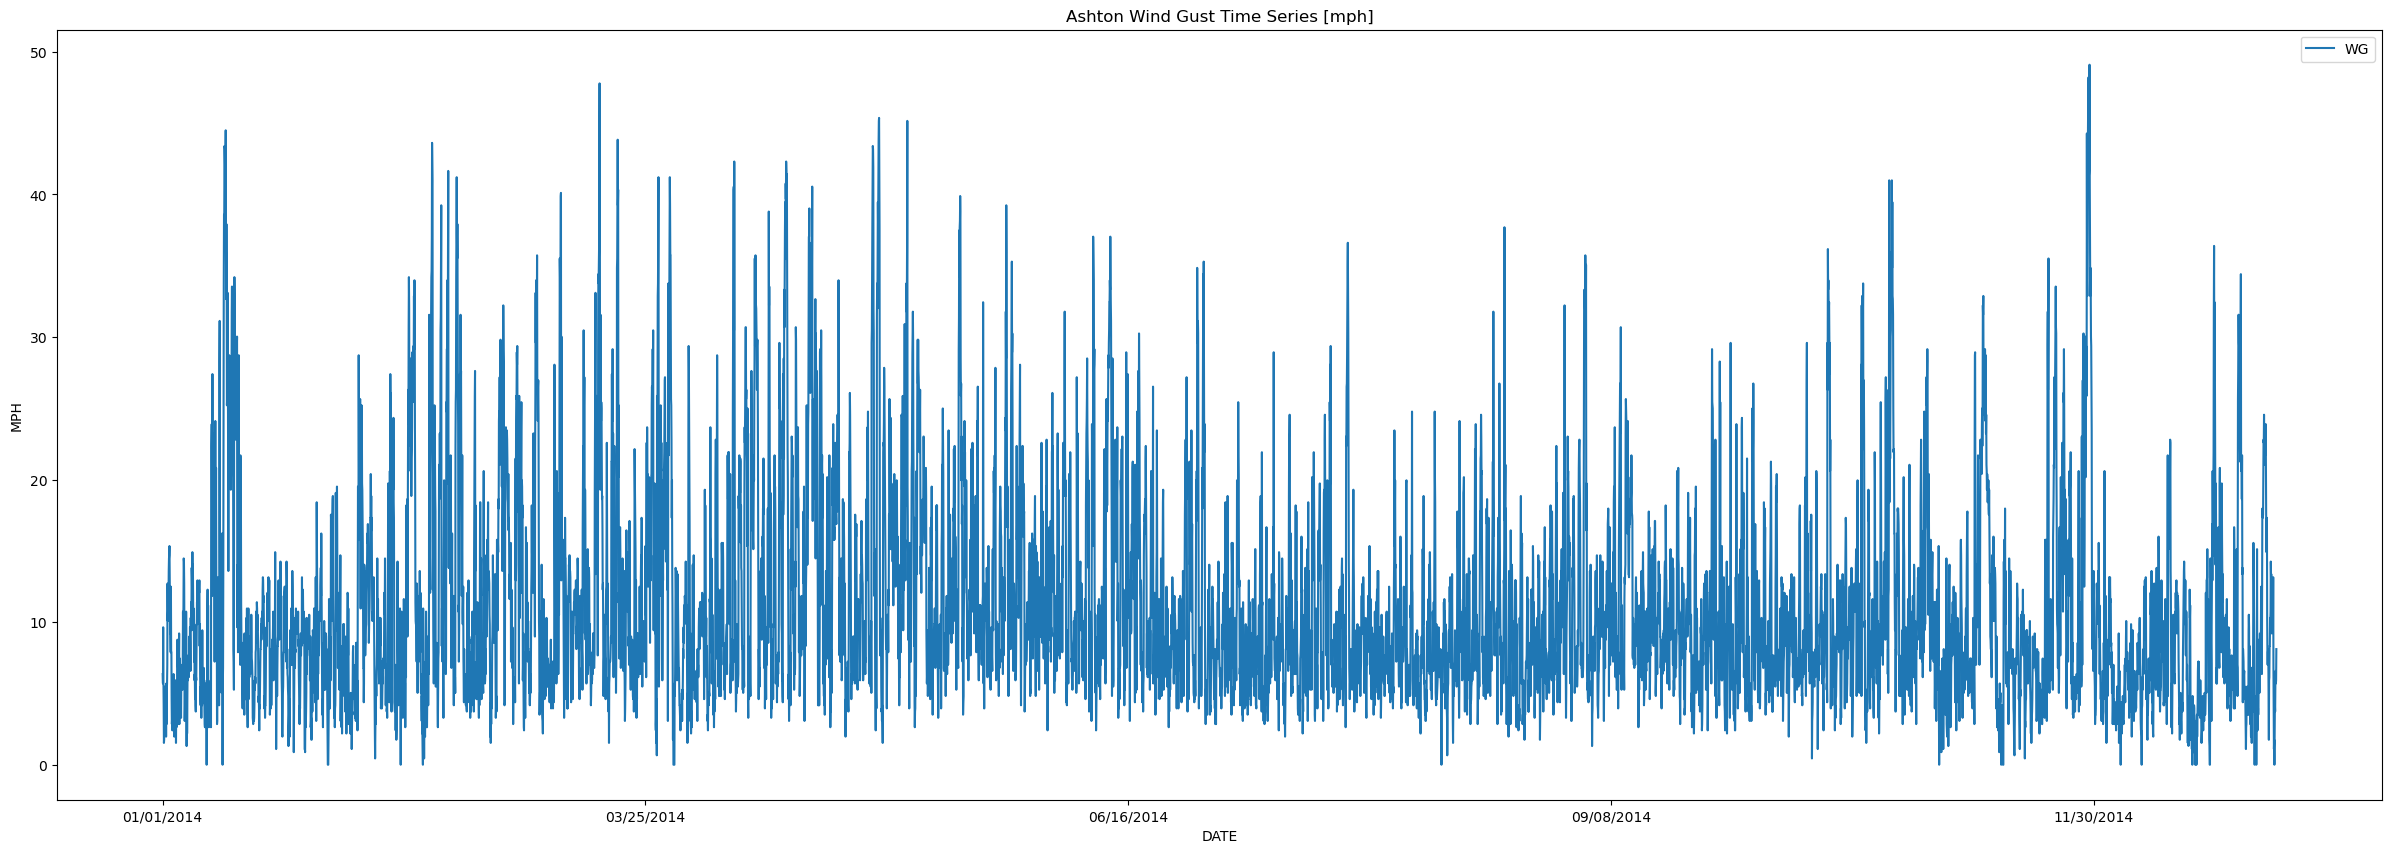

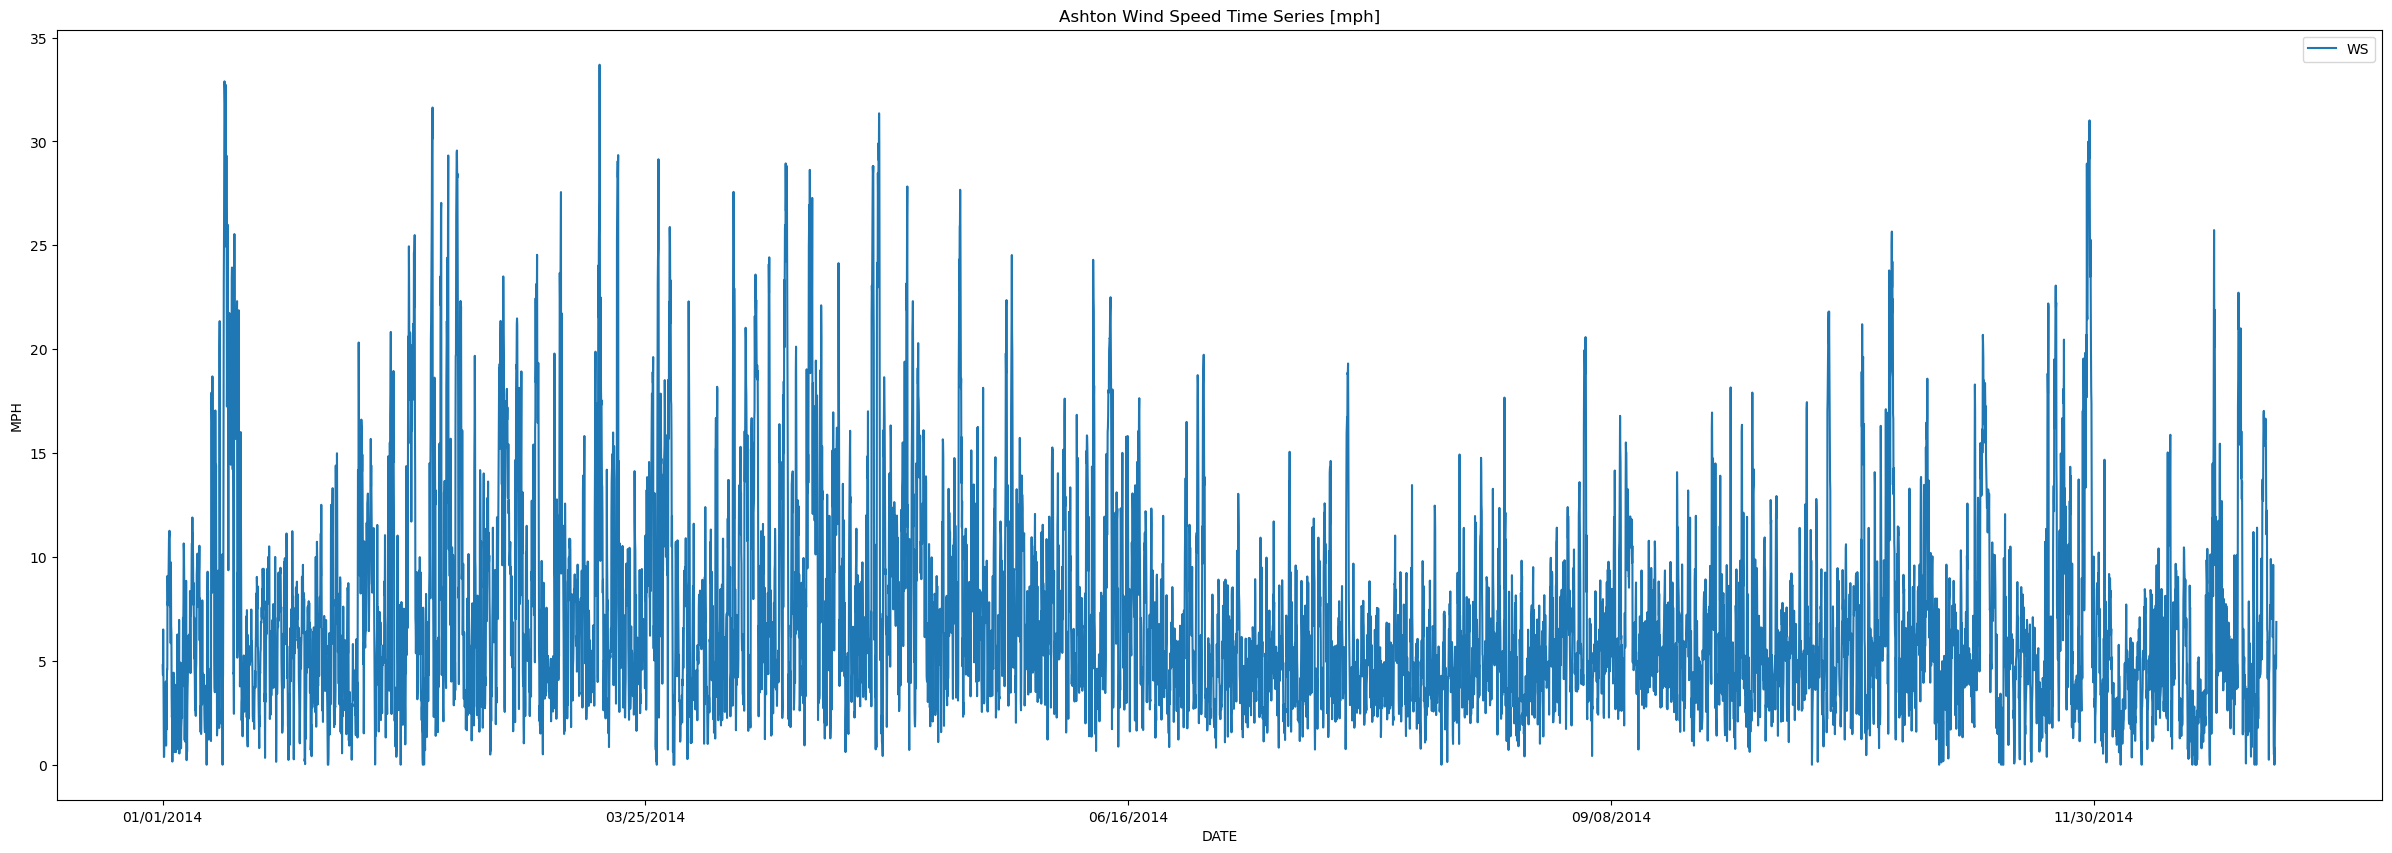

In [18]:
## Wind Gust Exploration for Ashton
ash.plot(kind = 'line', x = 'DATE', y = 'WD', 
         figsize = (30,10), 
         title = 'Ashton Wind Direction Time Series [degrees azimuth]', 
         ylabel = 'MPH')
plt.show()

ash.plot(kind = 'line', x = 'DATE', y = 'WG', 
         figsize = (30,10), 
         title = 'Ashton Wind Gust Time Series [mph]', 
         ylabel = 'MPH')
plt.show()

ash.plot(kind = 'line', x = 'DATE', y = 'WS', 
         figsize = (30,10), 
         title = 'Ashton Wind Speed Time Series [mph]', 
         ylabel = 'MPH')
plt.show()

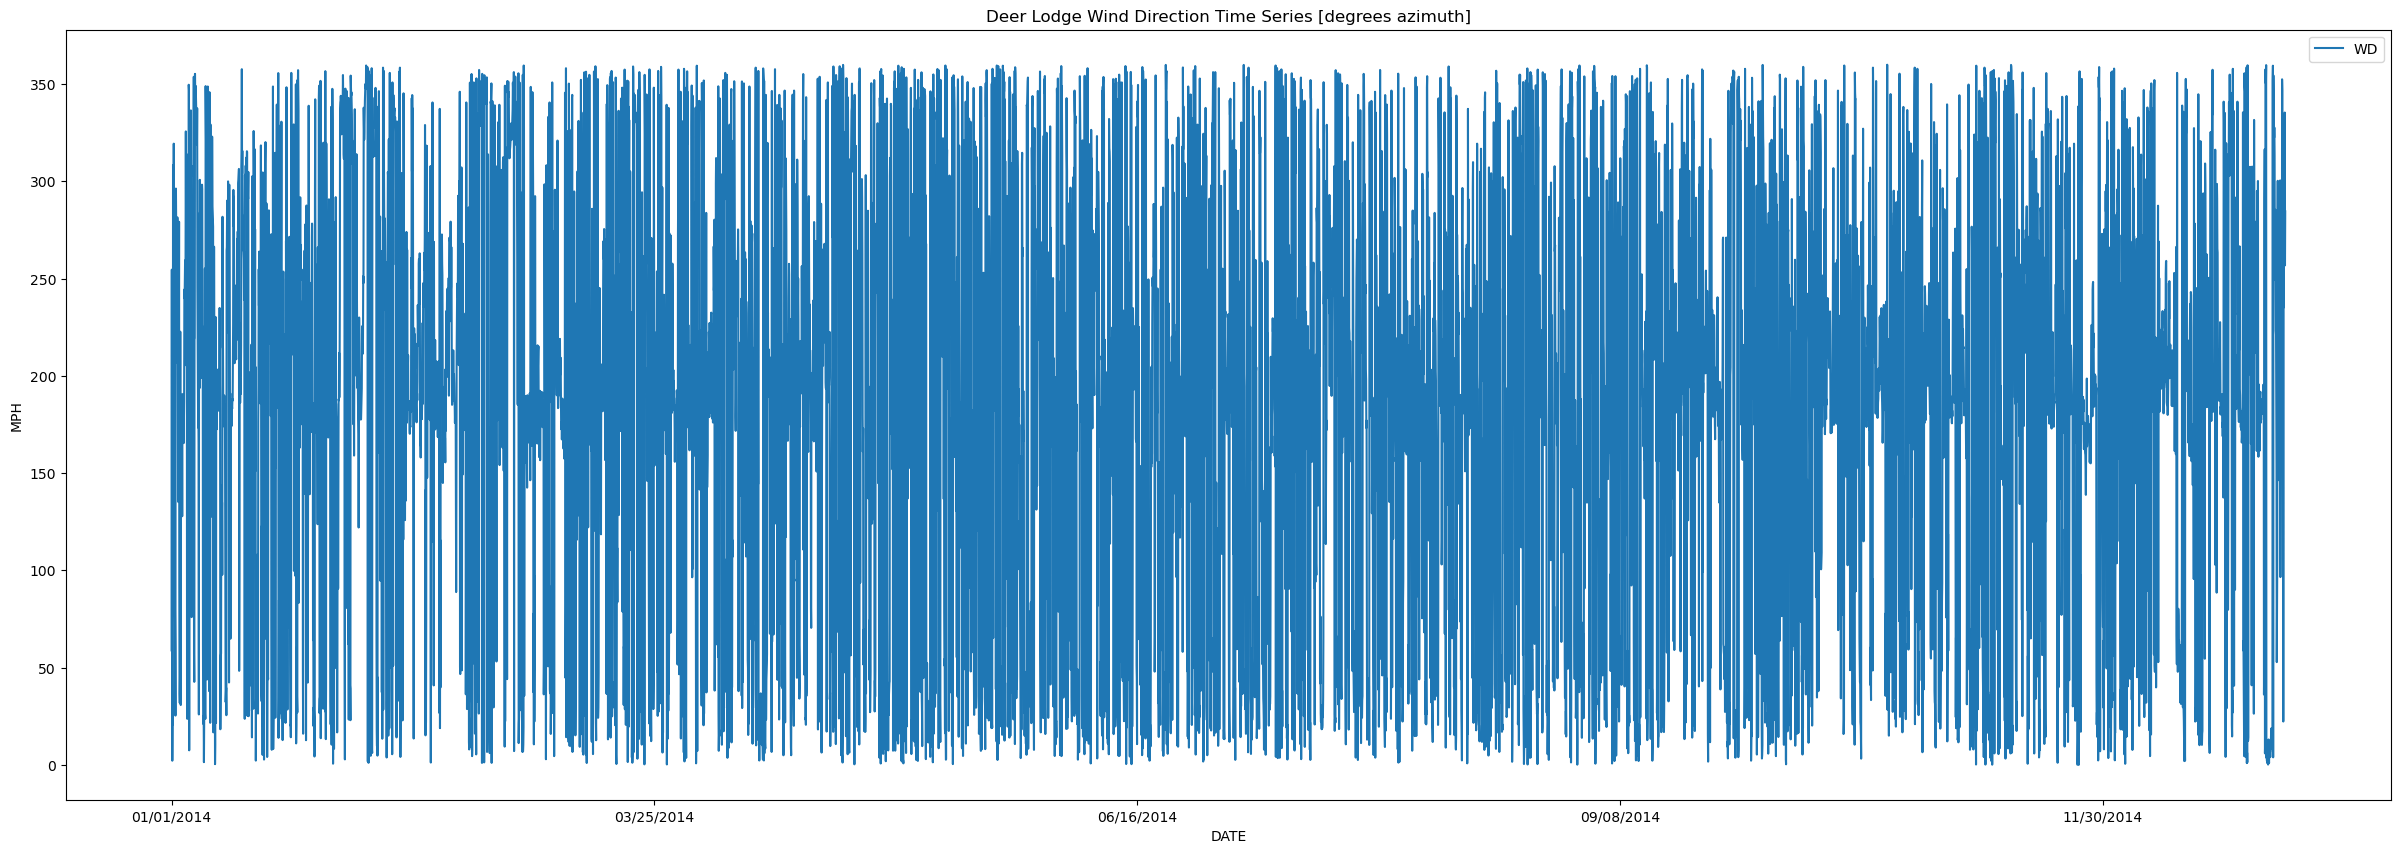

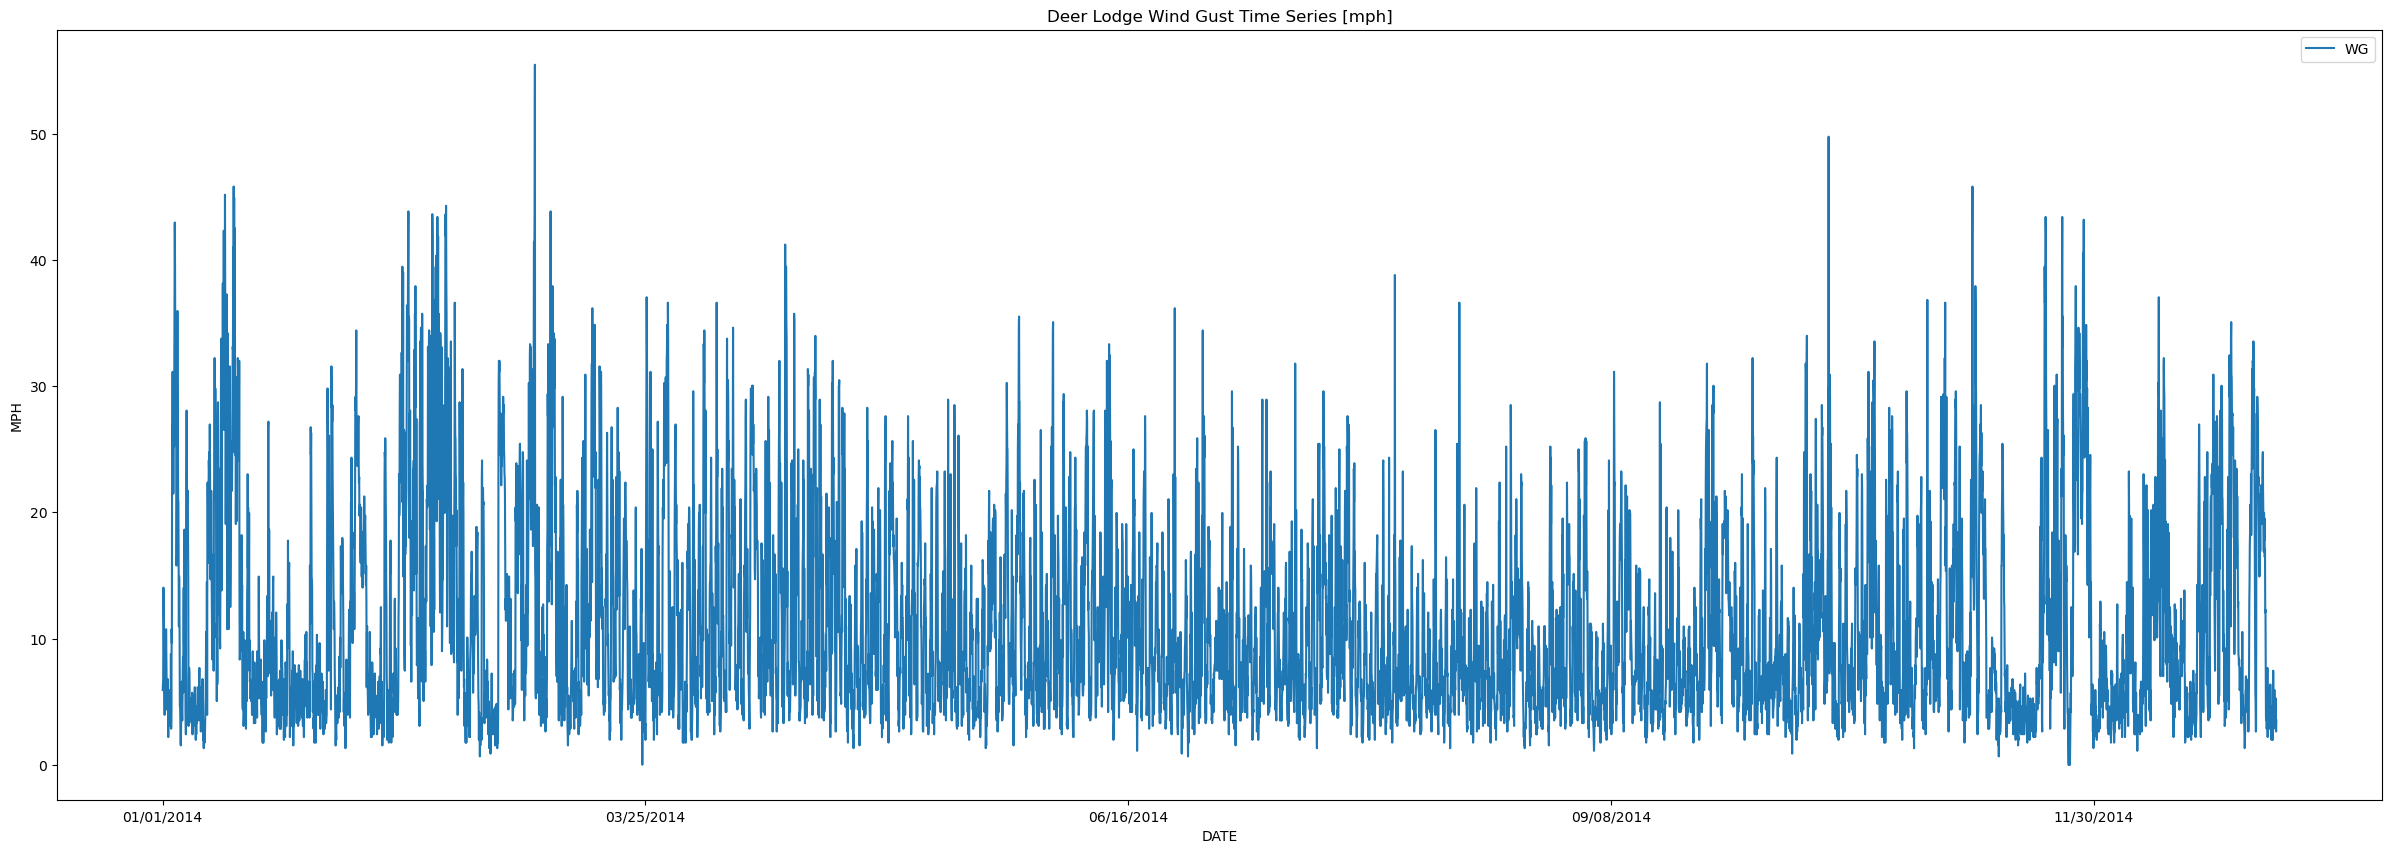

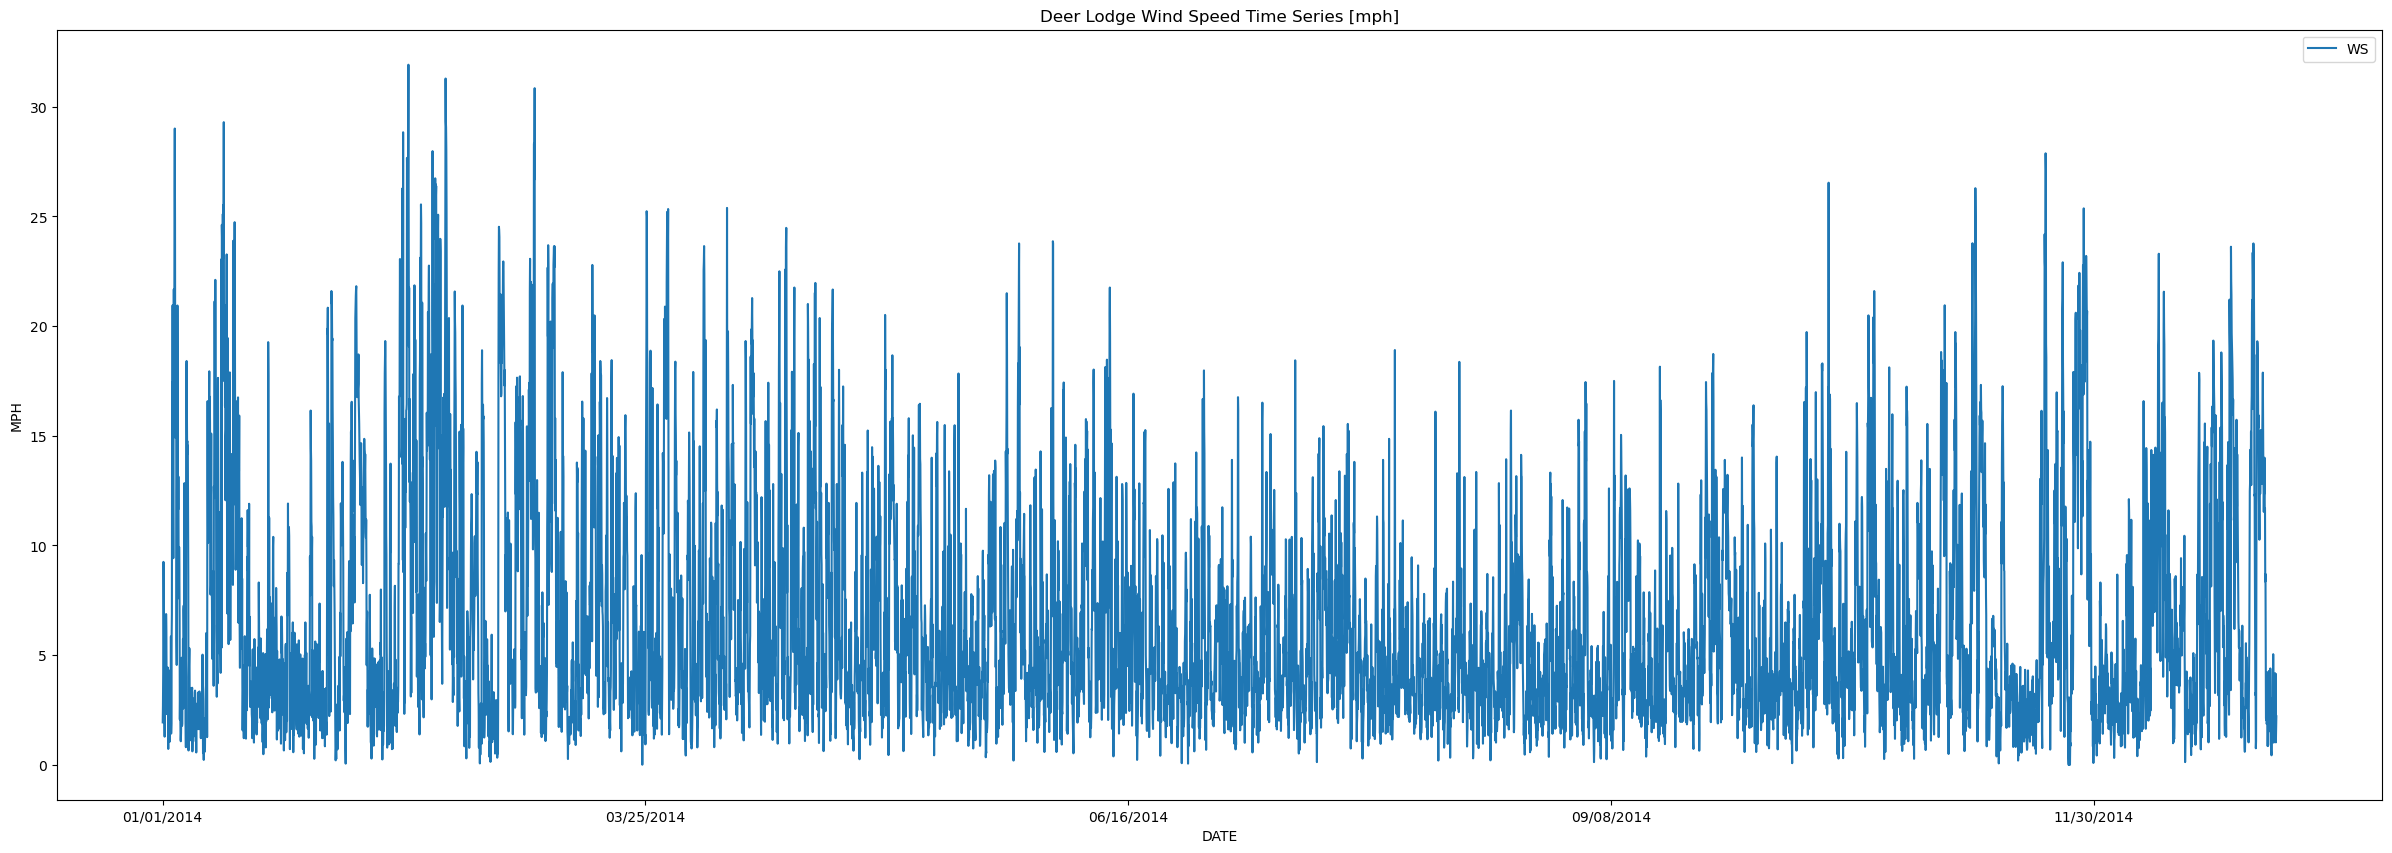

In [19]:
## Wind Gust Exploration for Ashton
deer.plot(kind = 'line', x = 'DATE', y = 'WD', 
         figsize = (30,10), 
         title = 'Deer Lodge Wind Direction Time Series [degrees azimuth]', 
         ylabel = 'MPH')
plt.show()

deer.plot(kind = 'line', x = 'DATE', y = 'WG', 
         figsize = (30,10), 
         title = 'Deer Lodge Wind Gust Time Series [mph]', 
         ylabel = 'MPH')
plt.show()

deer.plot(kind = 'line', x = 'DATE', y = 'WS', 
         figsize = (30,10), 
         title = 'Deer Lodge Wind Speed Time Series [mph]', 
         ylabel = 'MPH')
plt.show()

In [43]:
columns = ['WD', 'WG', 'WS']

ash_corr_matrix = ash[columns].corr()
print('Ashton Wind Corr Matrix')
print(ash_corr_matrix)

columns = ['WD', 'WG', 'WS']

deer_corr_matrix = deer[columns].corr()
print('Deer Lodge Wind Corr Matrix')
print(deer_corr_matrix)

Ashton Wind Corr Matrix
          WD        WG        WS
WD  1.000000  0.292268  0.230166
WG  0.292268  1.000000  0.967868
WS  0.230166  0.967868  1.000000
Deer Lodge Wind Corr Matrix
          WD        WG        WS
WD  1.000000  0.067022  0.081448
WG  0.067022  1.000000  0.962856
WS  0.081448  0.962856  1.000000


## Time Series Seasonal Decomposition

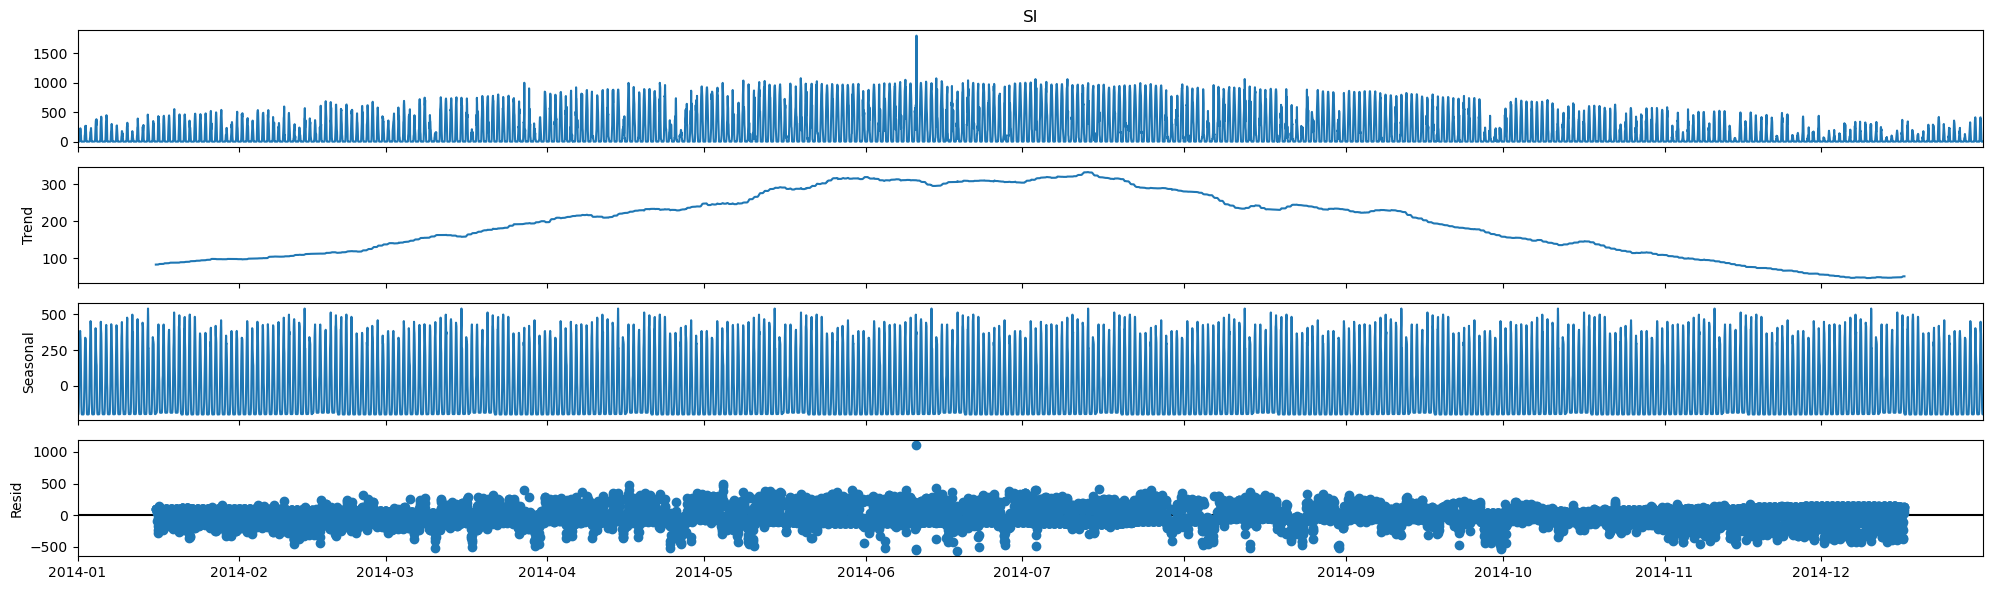

In [49]:
plt.rcParams.update({'figure.figsize': (20,6)})
#plt.plot(ash['SI'])

ash_results = seasonal_decompose(ash['SI'], model = 'additive', period = 720)
ash_results.plot()
plt.show()


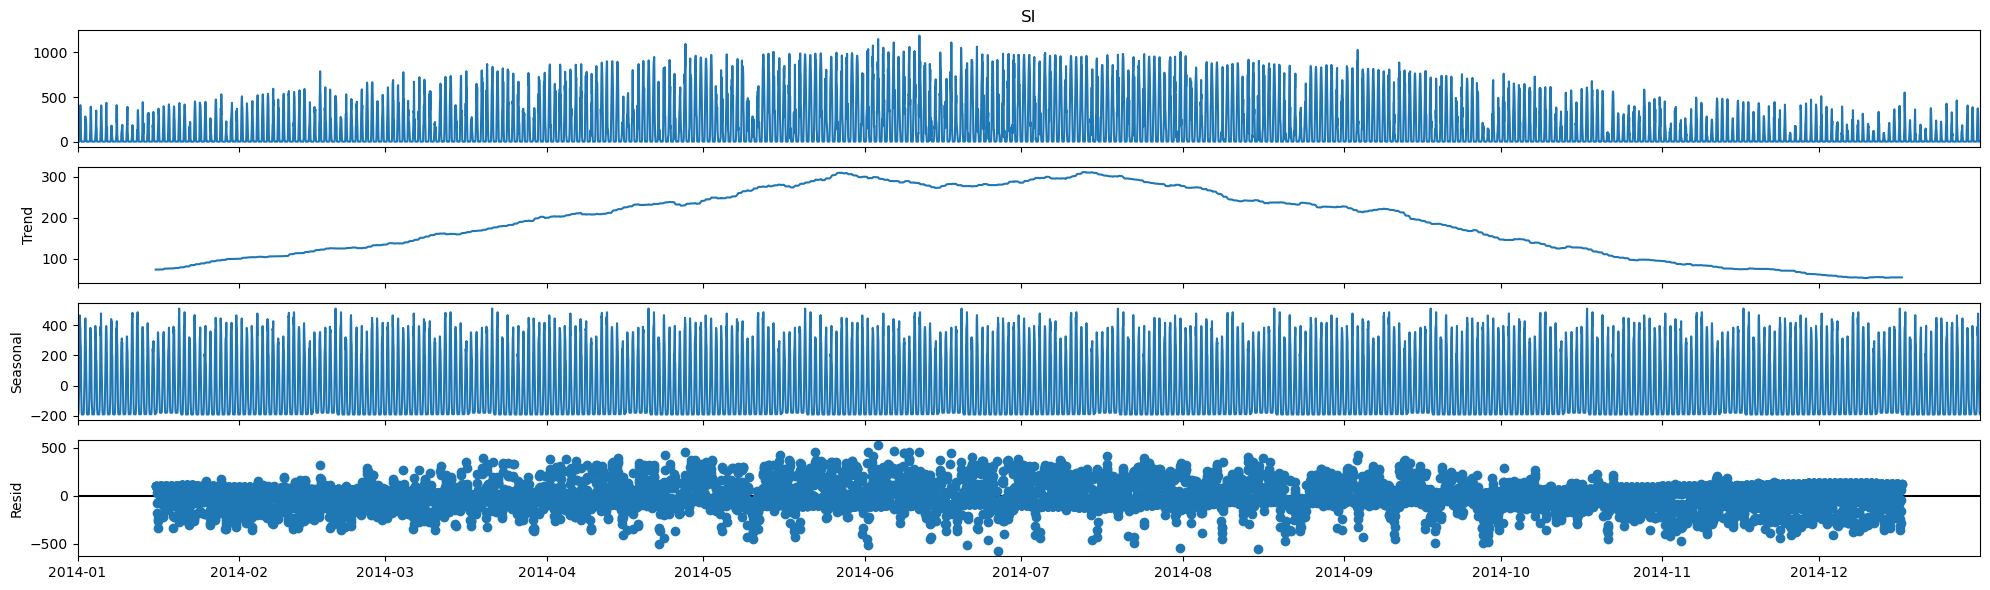

In [47]:
plt.rcParams.update({'figure.figsize': (20,6)})
#plt.plot(ash['SI'])

deer_results = seasonal_decompose(deer['SI'], model = 'additive', period = 720)
deer_results.plot()
plt.show()